In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
data = pd.read_csv("data.csv", index_col='ID')
data = data[data['Height'].notna()]
pd.set_option('display.max_columns', None)
data.head(2)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [3]:
print(f"Total number of players in dataset {data.shape[0]}")

Total number of players in dataset 18159


Задача 1 Built a histogram of the height distribution in meters from footbal player data. Remember that height is in format feet 'inches. Instead of filling null values with some constant just drop them. Use .dropna for specified column. (1 point)

In [4]:
data['Height'].dropna(inplace=True)

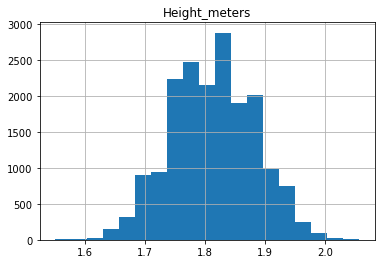

In [5]:
data['Height_feet'] = data['Height'].str.replace("'", '.').astype(str)

def convert_m(x):
    # перевод роста в метрическую систему
    
    feet = x[0]
    inch = x[2:]
    result = int(feet)*0.3048 + int(inch)*0.0254 
    return result

data['Height_meters'] = data.apply(lambda row: convert_m(row['Height_feet']) , axis=1)
data.hist(column='Height_meters', bins=19)
plt.show()

In [6]:
len(data['Height'])

18159

Задача 2 Write your own function for MSE calculation using the formula above. Calculate train and test MSE, compare to built-in method (_sklearn.metrics.mean_squarederror) (0.5 point)

In [7]:
from sklearn.model_selection import train_test_split

data.fillna({'BallControl': data['BallControl'].mean(), 'Dribbling': data['Dribbling'].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data['Dribbling'].values, data['BallControl'].values, train_size=0.8)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [8]:
from sklearn.linear_model import Ridge

lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

Ridge(alpha=0)

In [9]:
print(f'w_0 = {lr.intercept_}, w_1 = {lr.coef_[0]}')

w_0 = 12.49563576314521, w_1 = 0.8288274276345299


In [10]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
data['predicted_BallControl'] = lr.predict(data['Dribbling'].values.reshape(-1, 1))
data[['Name', 'Dribbling', 'BallControl', 'predicted_BallControl']].head()

,Name,Dribbling,BallControl,predicted_BallControl
ID,,,,
158023,L. Messi,97.0,96.0,92.891896
20801,Cristiano Ronaldo,88.0,94.0,85.432449
190871,Neymar Jr,96.0,95.0,92.063069
193080,De Gea,18.0,42.0,27.414529
192985,K. De Bruyne,86.0,91.0,83.774795


In [11]:
def mse(y_true, y_pred):
    error = np.power((y_true - y_pred), 2).sum() / len(y_true)
    return error

In [12]:
y_true = data['BallControl']
y_pred = data['predicted_BallControl']
mse(y_true, y_pred)

32.96267513207232

In [13]:
from sklearn.metrics import mean_squared_error

assert round(mean_squared_error(y_train, y_pred_train), 9) == round(mse(y_train, y_pred_train), 9)
assert round(mean_squared_error(y_test, y_pred_test), 9) == round(mse(y_test, y_pred_test), 9)

In [14]:
print(f'Train MSE {mse(y_train, y_pred_train)}, test MSE {mse(y_test, y_pred_test)}')

Train MSE 33.287264109678596, test MSE 31.664408590859104


Задача 3   Visualize the dependence of test BallControl predictions and real BallControl score on Dribbling score. Don't forget to add axis and plot names! (1.5 points).

In [15]:
data.fillna({'BallControl': data['BallControl'].mean(), 'Dribbling': data['Dribbling'].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data['Dribbling'].values, data['BallControl'].values, train_size=0.8)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

lr = Ridge(alpha=0)
lr.fit(X=X_test, y=y_test)

print(f'w_0 = {lr.intercept_}, w_1 = {lr.coef_[0]}')

y_pred_test = lr.predict(X_test)

data['predicted_BallControl'] = lr.predict(data['Dribbling'].values.reshape(-1, 1))
data[['Name', 'Dribbling', 'BallControl', 'predicted_BallControl']].head()

w_0 = 12.851881515887555, w_1 = 0.8223890922154125


,Name,Dribbling,BallControl,predicted_BallControl
ID,,,,
158023,L. Messi,97.0,96.0,92.623623
20801,Cristiano Ronaldo,88.0,94.0,85.222122
190871,Neymar Jr,96.0,95.0,91.801234
193080,De Gea,18.0,42.0,27.654885
192985,K. De Bruyne,86.0,91.0,83.577343


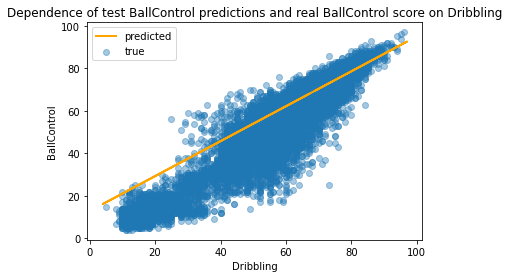

In [16]:
plt.scatter(data.BallControl, data.Dribbling, alpha=0.4)
plt.plot(X_test, lr.predict(X_test), color='Orange', linewidth=2)

plt.title('Dependence of test BallControl predictions and real BallControl score on Dribbling')
D_label_name = {"predicted":"orange", "true":"blue"}
plt.legend(D_label_name)
plt.xlabel('Dribbling')
plt.ylabel('BallControl')

plt.show()

Задача 4  Implement your own Linear Regression class for any number of input features and settable boolean parameter fit_intercept(5 points).

In [17]:
def compute_residuals(w, X, y):
    """
    Compute residuals when predicting y_hat as matrix product of X and transposed w
    :param w: linear regression weights, numpy.ndarrya: float64[num_features]
    :param X: training features, numpy.ndarray: float64[num_samples, num_features]
    :param y: training target, numpy.ndarray: float64[num_samples]
    :returns: vector of residuals (y_i_hat - y_i) for each sample_i in X
    
    """
    
    residuals = (X @ w.T) - y
    return residuals

In [36]:
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import least_squares

class LinearRegression(BaseEstimator):
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        """
        fit model weights given input features and target
        :param X: training features, numpy.ndarray: numeric[num_samples, num_features]
        :param y: training target, numpy.ndarray: numeric[num_samples]
        :returns: linear predictor with fitted weights so that train MSE is the lowest possible
        :note: weights: numpy.ndarray: float64[num_features] stored as class field

        """
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        
        # Save train data information. Necessary for following the uniform API
        self.X_ = X
        self.y_ = y
        self.n_features_in_ = X.shape[1]
        
        # Copy arrays and cast them to uniform type
        X_train = X.astype('float64')
        y_train = y.astype('float64')
        
        # Add dummy column of ones to X_train if we want to train an intercept - last component of future weight vector
        if self.fit_intercept:
            X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
        
        # Your code here.
        # Just follow the suggested steps: create initial weights vector,
        # apply least_squares optimizer passing the parameters described above
        # and finally extract optimized weights.
        # Remember: you need to distinguish coefficients from intercept when fit_intercept=True
        
        x0 = np.zeros(X_train.shape[1])
        result = least_squares(compute_residuals, x0, args=(X_train, y_train))
        if self.fit_intercept:
            self.coef_ = result.x[0:len(result.x)-1]
            self.intercept_ = result.x[-1]
        else:
            self.coef_ = result.x
            self.intercept_ = 0

        
        # Return the classifier
        return self
        
    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        
        return X.dot(self.coef_) + self.intercept_

In [37]:
#Testing area
from sklearn.utils.estimator_checks import check_estimator
from sklearn.linear_model import Ridge

lr = LinearRegression()
ridge = Ridge(alpha=0)
lr_no_intercept = LinearRegression(fit_intercept=False)
ridge_no_intercept = Ridge(alpha=0, fit_intercept=False)

#Check compatibility with Sklearn framework and apply some spesific internal tests
check_estimator(lr)
check_estimator(lr_no_intercept)

#Compare model accuracy with Ridge(0) from Sklearn
data.fillna({'BallControl': data['BallControl'].mean()
             , 'Dribbling': data['Dribbling'].mean()
             , 'Strength': data['Strength'].mean()}, inplace=True)
X_sample, y_sample = data[['Dribbling', 'Strength']], data['BallControl']
lr.fit(X_sample, y_sample)
ridge.fit(X_sample, y_sample)
assert np.allclose(lr.predict(X_sample), ridge.predict(X_sample), rtol=1e-03), "Your model with intercept not accurate enough!"
lr_no_intercept.fit(X_sample, y_sample)
ridge_no_intercept.fit(X_sample, y_sample)
assert np.allclose(lr_no_intercept.predict(X_sample), ridge_no_intercept.predict(X_sample), rtol=1e-03), "Your model without intercept not accurate enough!"

In [38]:
# extra assert

w=np.array([1, 1])
X=np.array([[2, 3], [3, 4], [4, 5]])
y=np.array([4, 5.5, 7])
compute_residuals(w, X, y)
res_2 = least_squares(compute_residuals, w, args=(X, y))
res_2.x
#array([0.5, 1. ])

array([0.5, 1. ])

Задача 5

5.1 Extract float number from Value field in DataFrame (0.5 points)

In [39]:
def convert_value(x):
    # convert str value to float
    
    number = x[1:]
    if number[-1] == 'M':
        number = float(number[:-1])
        return number
    elif number[-1] == 'K':
        number = float(number[:-1])
        return number / 1000
    else:
        return 0.0
    
data['Value_str'] = data['Value'].astype(str)    
data['Value_float_m'] = data.apply(lambda row: convert_value(row['Value_str']) , axis=1)
del data['Value_str']
data['Value_float_m']

ID
158023    110.50
20801      77.00
190871    118.50
193080     72.00
192985    102.00
           ...  
238813      0.06
243165      0.06
241638      0.06
246268      0.06
246269      0.06
Name: Value_float_m, Length: 18159, dtype: float64

5.2 Сhoose more features that you expect to influence on player Value (at least 10)

 features = 'Vision', 'Skill Moves', 'ShortPassing', 'Dribbling', 
                      'BallControl', 'LongPassing', 'Stamina','Composure', 
                      'Potential', 'Crossing',  'International Reputation'

5.3 Plot feature correlation matrix. (0.5 points)

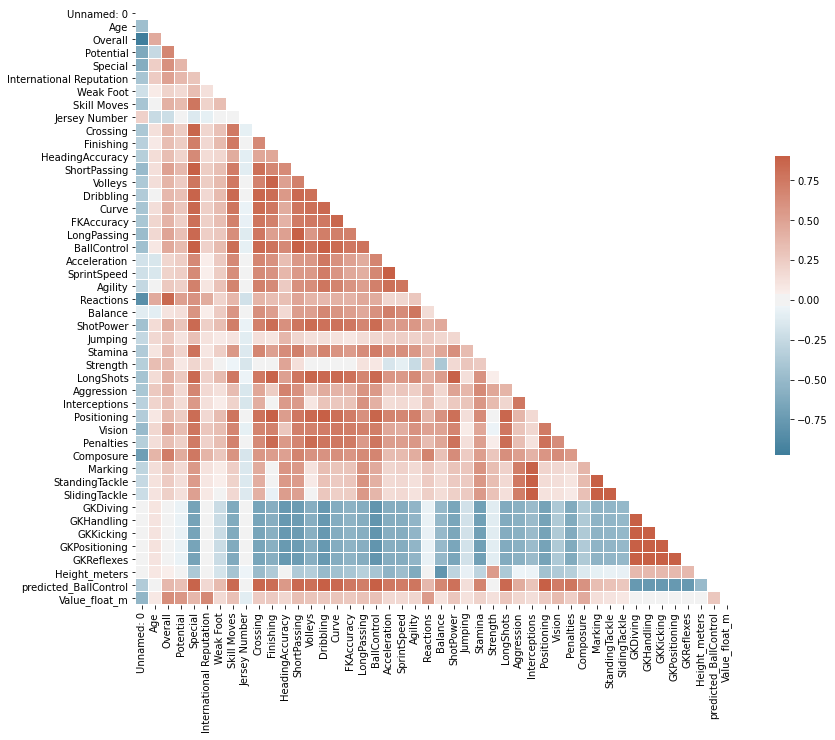

In [46]:
from string import ascii_letters

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [47]:
features_data = data[[ 'Vision', 'Skill Moves', 'ShortPassing', 'Dribbling', 
                      'BallControl', 'LongPassing', 'Stamina','Composure', 
                      'Potential', 'Crossing',  'International Reputation']].copy()

In [48]:
features_corr = features_data.corr(method='pearson', min_periods=1).abs()
features_corr

,Vision,Skill Moves,ShortPassing,Dribbling,BallControl,LongPassing,Stamina,Composure,Potential,Crossing,International Reputation
Vision,1.000000,0.674057,0.713524,0.730150,0.718411,0.698199,0.472335,0.636280,0.348141,0.684948,0.284600
Skill Moves,0.674057,1.000000,0.730363,0.839757,0.818051,0.622342,0.570226,0.586836,0.354290,0.741035,0.208153
ShortPassing,0.713524,0.730363,1.000000,0.843722,0.911451,0.895722,0.716659,0.685137,0.369189,0.809660,0.242803
Dribbling,0.730150,0.839757,0.843722,1.000000,0.938942,0.722465,0.686511,0.597498,0.315019,0.856647,0.179041
BallControl,0.718411,0.818051,0.911451,0.938942,1.000000,0.788650,0.728604,0.674881,0.354396,0.840916,0.217946
LongPassing,0.698199,0.622342,0.895722,0.722465,0.788650,1.000000,0.635627,0.645797,0.321437,0.756527,0.239525
Stamina,0.472335,0.570226,0.716659,0.686511,0.728604,0.635627,1.000000,0.523112,0.202563,0.672633,0.094780
Composure,0.636280,0.586836,0.685137,0.597498,0.674881,0.645797,0.523112,1.000000,0.440008,0.575446,0.392787
Potential,0.348141,0.354290,0.369189,0.315019,0.354396,0.321437,0.202563,0.440008,1.000000,0.246319,0.372993
Crossing,0.684948,0.741035,0.809660,0.856647,0.840916,0.756527,0.672633,0.575446,0.246319,1.000000,0.191770


5.4 Drop features that are highly correlated with each other (abs(corr) > 0.9) one by one until no correlated pairs left. Hint: you may reuse code from Task_9 in HW_1 for automatic correlated pairs selection. (1.5 points)

'BallControl' has correlation with 'ShortPassing' and 'Dribbling' more than 0.9, so I've got rid of it

In [49]:
features_data = data[[ 'Vision', 'Skill Moves', 'ShortPassing', 'Dribbling', 
                       'LongPassing', 'Stamina','Composure', 
                      'Potential', 'Crossing',  'International Reputation']].copy()

In [50]:
features_corr = features_data.corr(method='pearson', min_periods=1).abs()
features_corr
# No correlations > 0.9 left

,Vision,Skill Moves,ShortPassing,Dribbling,LongPassing,Stamina,Composure,Potential,Crossing,International Reputation
Vision,1.000000,0.674057,0.713524,0.730150,0.698199,0.472335,0.636280,0.348141,0.684948,0.284600
Skill Moves,0.674057,1.000000,0.730363,0.839757,0.622342,0.570226,0.586836,0.354290,0.741035,0.208153
ShortPassing,0.713524,0.730363,1.000000,0.843722,0.895722,0.716659,0.685137,0.369189,0.809660,0.242803
Dribbling,0.730150,0.839757,0.843722,1.000000,0.722465,0.686511,0.597498,0.315019,0.856647,0.179041
LongPassing,0.698199,0.622342,0.895722,0.722465,1.000000,0.635627,0.645797,0.321437,0.756527,0.239525
Stamina,0.472335,0.570226,0.716659,0.686511,0.635627,1.000000,0.523112,0.202563,0.672633,0.094780
Composure,0.636280,0.586836,0.685137,0.597498,0.645797,0.523112,1.000000,0.440008,0.575446,0.392787
Potential,0.348141,0.354290,0.369189,0.315019,0.321437,0.202563,0.440008,1.000000,0.246319,0.372993
Crossing,0.684948,0.741035,0.809660,0.856647,0.756527,0.672633,0.575446,0.246319,1.000000,0.191770
International Reputation,0.284600,0.208153,0.242803,0.179041,0.239525,0.094780,0.392787,0.372993,0.191770,1.000000


In [51]:
# Reused code from the previous home task ex.9, max correlation here is 'LongPassing'/'ShortPassing' 

num_cols = 10
top10_correlations = list(features_data.corr(method='pearson').abs().unstack().sort_values(ascending=False)
                    [num_cols:num_cols+20][::2].index)
top10_correlations = [sorted(t) for t in top10_correlations]
top10_correlations

[['LongPassing', 'ShortPassing'],
 ['Crossing', 'Dribbling'],
 ['Dribbling', 'ShortPassing'],
 ['Dribbling', 'Skill Moves'],
 ['Crossing', 'ShortPassing'],
 ['Crossing', 'LongPassing'],
 ['Crossing', 'Skill Moves'],
 ['ShortPassing', 'Skill Moves'],
 ['Dribbling', 'Vision'],
 ['Dribbling', 'LongPassing']]

5.5 Split data into train/test with some proportion (0.5 points)

In [52]:
features = ['Vision', 'Skill Moves', 'ShortPassing', 'Dribbling', 
            'LongPassing', 'Stamina','Composure', 
            'Potential', 'Crossing',  'International Reputation' ]
target = 'Value_float_m'
for feat in features:
    data.fillna({feat: data[feat].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data[features].values, data[target].values, train_size=0.8, random_state=2)

5.6 Train a model on train dataset, make predictions both for train and test. (0.5 points)

In [53]:
lr = Ridge(0)
lr.fit(X=X_train, y=y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

5.7 Measure the model quality in terms of MSE in train and test samples. (0.5 points)

In [54]:
print(f'Train MSE {mean_squared_error(y_train, y_pred_train)}, test MSE {mean_squared_error(y_test, y_pred_test)}')

Train MSE 13.021276248257115, test MSE 15.358466220235004


In [55]:
print(f'w_0 = {lr.intercept_}, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9 = {lr.coef_}')

w_0 = -31.821446075564314, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9 = [ 3.26177775e-02  4.67647924e-01 -3.56545172e-03 -2.42070715e-02
 -1.21467875e-02  2.96510193e-02  3.34046775e-02  3.17838601e-01
 -7.82489350e-03  6.70826158e+00]


5.8 Write a short report about the work done. Why did you take these particular features? Can you find a logical explanation for high correlation of some of your features? Are you satisfied with the quality of predictions? etc. (1 point)

Я выбрала следующие характеристики - 'Vision', 'Skill Moves', 'ShortPassing', 'Dribbling', 
                       'LongPassing', 'Stamina','Composure', 
                      'Potential', 'Crossing',  'International Reputation'

Стоимость игрока зависит от того, насколько хорошо он играет, поэтому я выбрала технические навыки ('ShortPassing', 'Dribbling', 'BallControl', 'LongPassing', 'Stamina', 'Vision'), которые были высокими у игроков первой пятерки рейтинга, эти навыки кажутся мне важными с технической точки зрения - если игрок хорошо контролирует мяч, то он, скорее всего, будет давать точные пасы и сможет легко обвести соперника, не потеряв мяч. Признаки хорошо коррелируют друг с другом.

In [56]:
features_data = data[[ 'Vision', 'Skill Moves', 'ShortPassing', 'Dribbling', 
                       'LongPassing', 'Stamina', 'Crossing']].copy()
features_corr = features_data.corr(method='pearson', min_periods=1).abs()
features_corr

,Vision,Skill Moves,ShortPassing,Dribbling,LongPassing,Stamina,Crossing
Vision,1.000000,0.674057,0.713524,0.730150,0.698199,0.472335,0.684948
Skill Moves,0.674057,1.000000,0.730363,0.839757,0.622342,0.570226,0.741035
ShortPassing,0.713524,0.730363,1.000000,0.843722,0.895722,0.716659,0.809660
Dribbling,0.730150,0.839757,0.843722,1.000000,0.722465,0.686511,0.856647
LongPassing,0.698199,0.622342,0.895722,0.722465,1.000000,0.635627,0.756527
Stamina,0.472335,0.570226,0.716659,0.686511,0.635627,1.000000,0.672633
Crossing,0.684948,0.741035,0.809660,0.856647,0.756527,0.672633,1.000000


В реальности цена за игрока в том числе зависит от неигровых параметров - его рейтинга, клуба, заключенных ранее контрактов с клубами и рекламных контрактов, потенциала (что уже является некой оценкой его профпригодности) и т.д. В данном датасете неигровыми параметрами, коррелирующими с Value оказались 'Potential', 'Composure', 'International Reputation'. Напротив, такие параметры, как 'Weight', 'Strength' или 'Jersey Number' подтвердили отсутствие влияния на ценообразование.

In [57]:
features_corr = data.corr(method='pearson', min_periods=1).abs()
features_corr.sort_values(by='Value_float_m', ascending=False)['Value_float_m'].head(7)

Value_float_m               1.000000
International Reputation    0.653176
Overall                     0.626913
Potential                   0.576528
Reactions                   0.540552
Unnamed: 0                  0.521771
Composure                   0.450352
Name: Value_float_m, dtype: float64

Результатом работы я довольна, предсказанные значения кажутся релевантными исходя из предоставленных данных, было интересно подбирать признаки и сравнивать влияние разных выборок на результат предсказания.

In [58]:
player = data[features + [target]].iloc[:]
player['Predicted_value'] = lr.predict(player[features].values)
player.head(10)

,Vision,Skill Moves,ShortPassing,Dribbling,LongPassing,Stamina,Composure,Potential,Crossing,International Reputation,Value_float_m,Predicted_value
ID,,,,,,,,,,,,
158023,94.0,4.0,90.0,97.0,87.0,72.0,96.0,94,84.0,5.0,110.5,37.492037
20801,82.0,5.0,81.0,88.0,77.0,88.0,95.0,94,84.0,5.0,77.0,38.380704
190871,87.0,5.0,84.0,96.0,78.0,81.0,94.0,93,79.0,5.0,118.5,37.807617
193080,68.0,1.0,50.0,18.0,51.0,43.0,68.0,93,17.0,4.0,72.0,29.436250
192985,94.0,4.0,92.0,86.0,91.0,90.0,88.0,92,93.0,4.0,102.0,30.554715
183277,89.0,4.0,89.0,95.0,83.0,83.0,91.0,91,81.0,4.0,93.0,29.950350
177003,92.0,4.0,93.0,90.0,88.0,89.0,84.0,91,86.0,4.0,67.0,29.999192
176580,84.0,3.0,82.0,87.0,64.0,90.0,85.0,91,77.0,5.0,80.0,36.515707
155862,63.0,3.0,78.0,63.0,77.0,84.0,82.0,91,66.0,4.0,51.0,29.367750
